## Research Question

Is there any relationship between the marital status of an individual and whether that individual has subscribed a term deposit or not? I have taken the Bank Marketing Data Set (http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#) from UCI Machine Learning Repository. Marital status is defined by the categorical variable **marital** and whether the individual has taken the term deposit or not is defined by the categorical variable **y**

## Loading libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the data

In [2]:
data = pd.read_csv("bank.csv", sep=";", usecols=[2, 16], dtype={'marital':'category', 'y':'category'})

In [3]:
data.shape

(4521, 2)

In [4]:
data.head(n=3)

,marital,y
0,married,no
1,married,no
2,single,no


The variable **marital** is a categorical variable with 3 levels <ol><li>married</li><li>single and</li><li>divorced</li></ol>

In [5]:
data['marital'].value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

Wherease the variable **y** whether the customer has taken a loan or not? is a binary categorical variable

In [6]:
data['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

## Setting Hypothesis

As we are testing the relationship between the variables **marital** and **y**, we can explain the null hypothesis as follows-

<ol><li>**Null Hypothesis:** There is nothing going on between the variables, there is no relationship between the two variables</li><br><li>**Alternate Hypothesis:** There is something going on between the explanatory and response variable, or there is a relationship between the two</li></ol>

## Chi square test

In [7]:
# contingency table of observed counts
ct1=pd.crosstab(data['y'], data['marital'])
print (ct1)

marital  divorced  married  single
y                                 
no            451     2520    1029
yes            77      277     167


In [8]:
# column percentages
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(colpct)

marital  divorced   married    single
y                                    
no       0.854167  0.900965  0.860368
yes      0.145833  0.099035  0.139632


The above table shows the observed counts for different levels of two categorical variables. Now we will calculate the expected values for the same provided the null hypothesis is true.

In [9]:
# chi-square
print('chi-square value, p value, expected counts')
cs1= st.chi2_contingency(ct1)
print(cs1[0:3])

chi-square value, p value, expected counts
(19.03005634409817, 7.3735354018237629e-05, 2)


In [10]:
print("expected distribution\n\n", cs1[3])

expected distribution

 [[  467.15328467  2474.67374475  1058.17297058]
 [   60.84671533   322.32625525   137.82702942]]


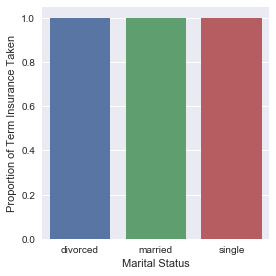

In [11]:
# graph percent with term insurance taken or not within each smoking frequency group 
data["marital"] = data["marital"].astype('category')

data['y'] = data['y'].apply(lambda y : 1 if y == 'yes' else 0)
data['y'] = pd.to_numeric(data['y'], errors='coerce')

sns.factorplot(x="marital", y="y", data=data[data['y'] == 1], kind="bar", ci=None)
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Term Insurance Taken')
plt.show()

## Post-Hoc Analysis

In [12]:
recode2 = {'divorced': 'divorced', 'married': 'married'}
data['comparison_1']= data['marital'].map(recode2)

# contingency table of observed counts
ct2=pd.crosstab(data['y'], data['comparison_1'])
print (ct2)

# column percentages
colsum=ct2.sum(axis=0)
colpct=ct2/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs2= st.chi2_contingency(ct2)
print (cs2)

comparison_1  divorced  married
y                              
0                  451     2520
1                   77      277
comparison_1  divorced   married
y                               
0             0.854167  0.900965
1             0.145833  0.099035
chi-square value, p value, expected counts
(9.7393437306311803, 0.0018036528145925006, 1, array([[  471.78586466,  2499.21413534],
       [   56.21413534,   297.78586466]]))


In the above **comparison_1**, we get p-value as 0.0018036528145925006 (< 0.017, after bonferroni adjustment). And these are the two groups which affect our target variable **y** i.e. whether the customer is divorced or married, it has a significant affect on his/her buying of a term insurance. 

In [13]:
recode3 = {'divorced': 'divorced', 'single': 'single'}
data['comparison_2']= data['marital'].map(recode3)

# contingency table of observed counts
ct3=pd.crosstab(data['y'], data['comparison_2'])
print (ct3)

# column percentages
colsum=ct3.sum(axis=0)
colpct=ct3/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs3= st.chi2_contingency(ct3)
print (cs3)

comparison_2  divorced  single
y                             
0                  451    1029
1                   77     167
comparison_2  divorced    single
y                               
0             0.854167  0.860368
1             0.145833  0.139632
chi-square value, p value, expected counts
(0.070511293712692824, 0.79059378691009763, 1, array([[  453.27146172,  1026.72853828],
       [   74.72853828,   169.27146172]]))


In **comparison_2**, we get p-value as 0.79059378691009763 (> 0.017, after bonferroni adjustment). This means these two groups are similar to each other. Divorced or single customers have same behaviour towards his/her purchasing a term deposit.

In [14]:
recode4 = {'married': 'married', 'single': 'single'}
data['comparison_3']= data['marital'].map(recode4)

# contingency table of observed counts
ct4=pd.crosstab(data['y'], data['comparison_3'])
print (ct4)

# column percentages
colsum=ct4.sum(axis=0)
colpct=ct4/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs4= st.chi2_contingency(ct4)
print (cs4)

comparison_3  married  single
y                            
0                2520    1029
1                 277     167
comparison_3   married    single
y                               
0             0.900965  0.860368
1             0.099035  0.139632
chi-square value, p value, expected counts
(13.563353526352158, 0.00023064464416217606, 1, array([[ 2485.98873028,  1063.01126972],
       [  311.01126972,   132.98873028]]))


In the last **comparison_3**, we get p-value as 0.00023064464416217606 (< 0.017, after bonferroni adjustment). This means these two groups are different from each other. And whether a customer purchased term deposit or not, it depends on their marital status.